In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='dark')

In [6]:
#Load Dataset and show head
comments = pd.read_csv('/content/drive/MyDrive/_datasets/Snappfood.csv', sep="\t", encoding='utf-8')
print(comments.shape)
comments.head()

(70000, 4)


,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0


In [7]:
#preprocessing => remove garbage column and drop rows with null and convert label_id to int
comments.drop('Unnamed: 0', axis=1, inplace=True)
comments.dropna(inplace=True)
comments['label_id'] = comments['label_id'].astype(int)
comments.head()

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [8]:
#load persian stopwords
stop_words = open('/content/drive/MyDrive/_datasets/stopwords.dat').read().split('\n')

In [9]:
#remove stopwords from dataset 
comments['comment'] = comments['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(comments.shape)
comments.head()

(69480, 3)


,comment,label,label_id
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0
4,شیرینی وانیلی مدل بود.,HAPPY,0


In [10]:
# Filter valid comments
comments['numberOFletters'] = comments.comment.str.len()
comments.loc[comments['numberOFletters']<=0, 'numberOFletters'] = np.NaN
comments.dropna(inplace=True)
print(comments.shape)
comments.head()

(69155, 4)


,comment,label,label_id,numberOFletters
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,34.0
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,102.0
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,71.0
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,65.0
4,شیرینی وانیلی مدل بود.,HAPPY,0,22.0


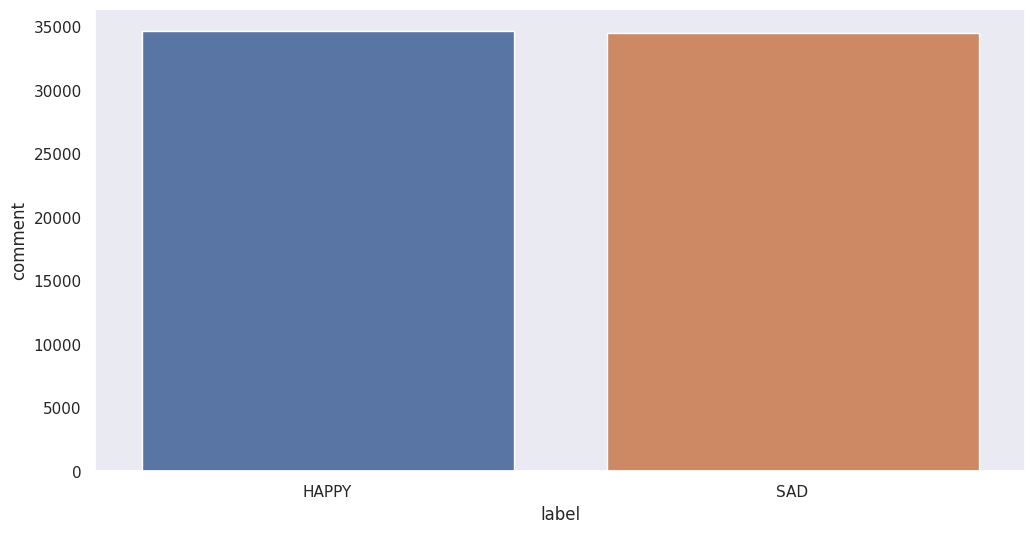

In [11]:
#Visualization SAD and HAPPY labels
d = comments.groupby(by=['label']).count().sort_values(by='comment', ascending=False).reset_index().head(15)
plt.figure(figsize=(12, 6))
_ = sb.barplot(data=d, x='label', y='comment')

In [12]:
import re
#from parsivar import Normalizer, FindStems
from hazm import Stemmer, Normalizer, WordTokenizer, InformalNormalizer, Lemmatizer, SentenceTokenizer 
w_tokenizer = SentenceTokenizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
tokenizer = WordTokenizer()
normalizer = Normalizer(persian_numbers=True)
normalizer_2 = Normalizer(token_based=True)
infNorm = InformalNormalizer()
#normalizer_2.token_spacing(['کتاب', 'ها'])
def clean_text(t):
  #print(t)
  t = re.sub('[a-zA-Z0-9#!?؟:$@%\.,\-()"*+-،۰۱۲۳۴۵۶۷۸۹]', '', t)
  #mohavereh to formal
  #t = infNorm.normalize(t)
  #print(t)
  #t = re.sub('[۰۱۲۳۴۵۶۷۸۹a-zA-Z#؟:$@%\,?!\-()"*+-0-9]', '', t)
  #print(t)
  t = normalizer.normalize(t)
  #print(t)
  t = normalizer.character_refinement(t)
  #print(t)
  text = normalizer.punctuation_spacing(t)
  #print(t)
  #words = tokenizer.tokenize(t)
  #print(t)
  st = ""
  for w in w_tokenizer.tokenize(text):
    st = st + lemmatizer.lemmatize(w) + " "
  return st
  '''
  for word in words:
    word = stemmer.stem(word)
    s = s + word + ' '
  
  for i in range(len(words)):
    words[i] = stemmer.stem(words[i])
    s = s + words[i] + ' '
  #print(t)'''
  #return s
clean_text('سلام 2 * خوبییی کجا رفت یه پسر خوب ایرونی ؟" ؟')

'سلام خوبییی کجا رفت یه پسر خوب ایرونی '

In [13]:
from hazm import Lemmatizer, SentenceTokenizer 
w_tokenizer = SentenceTokenizer()
lemmatizer = Lemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st

lemmatize_text('سلام خوبییی کجا رفت یه پسر خوب ایرونی ن')

'سلام خوبییی کجا رفت یه پسر خوب ایرونی ن '

In [14]:
comments['clean']=comments['comment'].apply(clean_text)
comments['clean']=comments['clean'].apply(normalizer.punctuation_spacing)
#comments['clean'] = comments.clean.apply(lemmatize_text)
comments['num_clean'] = comments.clean.str.len()
comments.loc[comments['num_clean']<=0, 'num_clean'] = np.NaN
comments.dropna(inplace=True)
print(comments.shape)
comments.head()

(68913, 6)


,comment,label,label_id,numberOFletters,clean,num_clean
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,34.0,حیف وقت بنویسم سرویس دهیتون افتضاح,35.0
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,102.0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,101.0
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,71.0,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,70.0
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,65.0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,65.0
4,شیرینی وانیلی مدل بود.,HAPPY,0,22.0,شیرینی وانیلی مدل بود,22.0


In [15]:
reviews = comments['clean'].values
labels = comments['label_id'].values # {"SAD":1, "HAPPY":0}

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
vectorizer = TfidfVectorizer(max_features=150) # , ngram_range=(1,2) , stop_words=stop_words
X = vectorizer.fit_transform(reviews)
vocab = vectorizer.get_feature_names_out()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

In [17]:
TfidfVectorizerWords = list(dict(list(word_counts.values())[1]).keys())
for i in range(len(TfidfVectorizerWords)):
  if len(TfidfVectorizerWords[i])==0:
    print("Empty")
print(len(TfidfVectorizerWords))
print(TfidfVectorizerWords)

150
['آب', 'ارسال', 'است', 'اسنپ', 'اشتباه', 'اضافه', 'افتضاح', 'العاده', 'انتظار', 'اندازه', 'ای', 'بابت', 'باشه', 'بدی', 'برام', 'برخورد', 'برنج', 'برگر', 'بستنی', 'بسته', 'بشه', 'بقیه', 'بود', 'بودم', 'بودن', 'بوی', 'بیات', 'تاخیر', 'تاریخ', 'تحویل', 'تر', 'تشکر', 'تماس', 'ته', 'توجه', 'توضیحات', 'تومن', 'تکه', 'تیکه', 'جعبه', 'جوجه', 'حجم', 'خام', 'خامه', 'خرید', 'خشک', 'خمیر', 'خوبه', 'خوردم', 'خوردن', 'خورده', 'خوشمزه', 'داشت', 'داغ', 'دست', 'دستم', 'دقیقه', 'دوست', 'راضی', 'رستوران', 'رسید', 'روغن', 'ریخته', 'زده', 'زمینی', 'ساعت', 'سالاد', 'ساندویچ', 'سرخ', 'سرد', 'سس', 'سفارش', 'سفت', 'سلام', 'سوخاری', 'سوخته', 'سیب', 'سیر', 'شد', 'شدت', 'شده', 'شور', 'شیرینی', 'طعم', 'ظرف', 'عالی', 'عالیه', 'عدد', 'عکس', 'غذا', 'غذای', 'فرستادن', 'فرستاده', 'فود', 'فیله', 'قارچ', 'قیمت', 'قیمتش', 'متاسفم', 'مرغ', 'مزه', 'مشتری', 'ممنون', 'ممنونم', 'منو', 'مواد', 'موقع', 'مونده', 'می', 'میداد', 'میدم', 'میشد', 'میشه', 'نان', 'نبود', 'نبودم', 'نداره', 'نداشت', 'نظرم', 'نمی', 'نوشابه', 'نوشته', 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
vectorizer = CountVectorizer(max_features=150) # , ngram_range=(1,2) , stop_words=stop_words
X = vectorizer.fit_transform(reviews)
vocab = vectorizer.get_feature_names_out()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]

In [19]:
CountVectorizerWords = list(dict(list(word_counts.values())[1]).keys())
for i in range(len(CountVectorizerWords)):
  if len(CountVectorizerWords[i])==0:
    print("Empty")
print(len(CountVectorizerWords))
print(CountVectorizerWords)

150
['آب', 'ارسال', 'است', 'اسنپ', 'اشتباه', 'اضافه', 'افتضاح', 'العاده', 'انتظار', 'اندازه', 'ای', 'بابت', 'باشه', 'بدی', 'برام', 'برخورد', 'برنج', 'برگر', 'بستنی', 'بسته', 'بشه', 'بقیه', 'بود', 'بودم', 'بودن', 'بوی', 'بیات', 'تاخیر', 'تاریخ', 'تحویل', 'تر', 'تشکر', 'تماس', 'ته', 'توجه', 'توضیحات', 'تومن', 'تکه', 'تیکه', 'جعبه', 'جوجه', 'حجم', 'خام', 'خامه', 'خرید', 'خشک', 'خمیر', 'خوبه', 'خوردم', 'خوردن', 'خورده', 'خوشمزه', 'داشت', 'داغ', 'دست', 'دستم', 'دقیقه', 'دوست', 'راضی', 'رستوران', 'رسید', 'روغن', 'ریخته', 'زده', 'زمینی', 'ساعت', 'سالاد', 'ساندویچ', 'سرخ', 'سرد', 'سس', 'سفارش', 'سفت', 'سلام', 'سوخاری', 'سوخته', 'سیب', 'سیر', 'شد', 'شدت', 'شده', 'شور', 'شیرینی', 'طعم', 'ظرف', 'عالی', 'عالیه', 'عدد', 'عکس', 'غذا', 'غذای', 'فرستادن', 'فرستاده', 'فود', 'فیله', 'قارچ', 'قیمت', 'قیمتش', 'متاسفم', 'مرغ', 'مزه', 'مشتری', 'ممنون', 'ممنونم', 'منو', 'مواد', 'موقع', 'مونده', 'می', 'میداد', 'میدم', 'میشد', 'میشه', 'نان', 'نبود', 'نبودم', 'نداره', 'نداشت', 'نظرم', 'نمی', 'نوشابه', 'نوشته', 

In [20]:
FinalVector = []
for word in TfidfVectorizerWords:
  if word in CountVectorizerWords:
    FinalVector.append(word)
print(len(FinalVector))
print(FinalVector)

150
['آب', 'ارسال', 'است', 'اسنپ', 'اشتباه', 'اضافه', 'افتضاح', 'العاده', 'انتظار', 'اندازه', 'ای', 'بابت', 'باشه', 'بدی', 'برام', 'برخورد', 'برنج', 'برگر', 'بستنی', 'بسته', 'بشه', 'بقیه', 'بود', 'بودم', 'بودن', 'بوی', 'بیات', 'تاخیر', 'تاریخ', 'تحویل', 'تر', 'تشکر', 'تماس', 'ته', 'توجه', 'توضیحات', 'تومن', 'تکه', 'تیکه', 'جعبه', 'جوجه', 'حجم', 'خام', 'خامه', 'خرید', 'خشک', 'خمیر', 'خوبه', 'خوردم', 'خوردن', 'خورده', 'خوشمزه', 'داشت', 'داغ', 'دست', 'دستم', 'دقیقه', 'دوست', 'راضی', 'رستوران', 'رسید', 'روغن', 'ریخته', 'زده', 'زمینی', 'ساعت', 'سالاد', 'ساندویچ', 'سرخ', 'سرد', 'سس', 'سفارش', 'سفت', 'سلام', 'سوخاری', 'سوخته', 'سیب', 'سیر', 'شد', 'شدت', 'شده', 'شور', 'شیرینی', 'طعم', 'ظرف', 'عالی', 'عالیه', 'عدد', 'عکس', 'غذا', 'غذای', 'فرستادن', 'فرستاده', 'فود', 'فیله', 'قارچ', 'قیمت', 'قیمتش', 'متاسفم', 'مرغ', 'مزه', 'مشتری', 'ممنون', 'ممنونم', 'منو', 'مواد', 'موقع', 'مونده', 'می', 'میداد', 'میدم', 'میشد', 'میشه', 'نان', 'نبود', 'نبودم', 'نداره', 'نداشت', 'نظرم', 'نمی', 'نوشابه', 'نوشته', 

In [21]:
#apply and remove adtional text
def fff(text):
  s = ""
  text_words = text.split(' ')
  for word in text_words:
    if word not in FinalVector:
      continue
    else:
      s = s + " " + word
  return s

In [22]:
fff('سلا سفار بدس وبه دلیل ن خامه ای آفتاب داغ بودوپیک فروشگاه تحویل')

' خامه ای داغ تحویل'

In [23]:
comments['clean']=comments['clean'].apply(normalizer.punctuation_spacing)
comments['newText']=comments['clean'].apply(fff)
comments['num_clean'] = comments.newText.str.len()
comments.loc[comments['num_clean']<4, 'num_clean'] = np.NaN
comments.dropna(inplace=True)
comments = comments.drop(['numberOFletters', 'num_clean'], axis=1)
print(comments.shape)
comments.head()

(65189, 5)


,comment,label,label_id,clean,newText
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,حیف وقت بنویسم سرویس دهیتون افتضاح,افتضاح
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,نیم ساعت موقع رسید مزه
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,قیمت کیفیتش نداره قارچ
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,اندازه کیفیت باشه مشتری
4,شیرینی وانیلی مدل بود.,HAPPY,0,شیرینی وانیلی مدل بود,شیرینی بود


In [28]:
reviews = comments['newText'].values
labels = comments['label_id'].values # {"SAD":1, "HAPPY":0}

In [29]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.25 , stratify = labels, random_state=42 )

In [26]:
import math
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)


def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data


def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors


def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [30]:
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = np.array(predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences))

In [31]:
pred[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [32]:
from sklearn.metrics import  precision_score, recall_score, f1_score, classification_report, accuracy_score
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))
print("precision_score of prediction on test set : ", precision_score(test_labels,pred))
print("recall_score of prediction on test set : ", recall_score(test_labels,pred))
print("f1_score of prediction on test set : ", f1_score(test_labels,pred))
print("classification_report of prediction on test set : \n", classification_report(test_labels,pred))

Accuracy of prediction on test set :  0.5463860596392195
precision_score of prediction on test set :  0.5291881443298969
recall_score of prediction on test set :  0.9896373056994818
f1_score of prediction on test set :  0.6896175322221756
classification_report of prediction on test set : 
               precision    recall  f1-score   support

           0       0.89      0.09      0.16      7999
           1       0.53      0.99      0.69      8299

    accuracy                           0.55     16298
   macro avg       0.71      0.54      0.42     16298
weighted avg       0.71      0.55      0.43     16298



In [34]:
comments.head(10)

,comment,label,label_id,clean,newText
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,حیف وقت بنویسم سرویس دهیتون افتضاح,افتضاح
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,نیم ساعت موقع رسید مزه
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,قیمت کیفیتش نداره قارچ
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,اندازه کیفیت باشه مشتری
4,شیرینی وانیلی مدل بود.,HAPPY,0,شیرینی وانیلی مدل بود,شیرینی بود
5,بدترین پیتزایی خورده,SAD,1,بدترین پیتزایی خورده,خورده
6,ممنونم,HAPPY,0,ممنون,ممنون
7,کیفیت غذا متوسط پایین رستوران غذا خوردی درحالی...,SAD,1,کیفیت غذا متوسط پایین رستوران غذا خوردی درحالی...,کیفیت غذا پایین رستوران غذا رستوران اسنپ فود
9,هات داگ دورش سوخته داخلش خام بود!!!!,SAD,1,هات داگ دورش سوخته داخلش خام بود,هات سوخته خام بود
10,اکلر العاده بافت چیزکیک مونده دوست نداشتم.,HAPPY,0,اکلر العاده بافت چیزکیک مونده دوست نداشتم,العاده مونده دوست


In [52]:
FinalVectorLabelEncodein = {}
for i in range(len(FinalVector)):
  FinalVectorLabelEncodein[FinalVector[i]] = i+1
print(FinalVectorLabelEncodein)

{'آب': 0, 'ارسال': 1, 'است': 2, 'اسنپ': 3, 'اشتباه': 4, 'اضافه': 5, 'افتضاح': 6, 'العاده': 7, 'انتظار': 8, 'اندازه': 9, 'ای': 10, 'بابت': 11, 'باشه': 12, 'بدی': 13, 'برام': 14, 'برخورد': 15, 'برنج': 16, 'برگر': 17, 'بستنی': 18, 'بسته': 19, 'بشه': 20, 'بقیه': 21, 'بود': 22, 'بودم': 23, 'بودن': 24, 'بوی': 25, 'بیات': 26, 'تاخیر': 27, 'تاریخ': 28, 'تحویل': 29, 'تر': 30, 'تشکر': 31, 'تماس': 32, 'ته': 33, 'توجه': 34, 'توضیحات': 35, 'تومن': 36, 'تکه': 37, 'تیکه': 38, 'جعبه': 39, 'جوجه': 40, 'حجم': 41, 'خام': 42, 'خامه': 43, 'خرید': 44, 'خشک': 45, 'خمیر': 46, 'خوبه': 47, 'خوردم': 48, 'خوردن': 49, 'خورده': 50, 'خوشمزه': 51, 'داشت': 52, 'داغ': 53, 'دست': 54, 'دستم': 55, 'دقیقه': 56, 'دوست': 57, 'راضی': 58, 'رستوران': 59, 'رسید': 60, 'روغن': 61, 'ریخته': 62, 'زده': 63, 'زمینی': 64, 'ساعت': 65, 'سالاد': 66, 'ساندویچ': 67, 'سرخ': 68, 'سرد': 69, 'سس': 70, 'سفارش': 71, 'سفت': 72, 'سلام': 73, 'سوخاری': 74, 'سوخته': 75, 'سیب': 76, 'سیر': 77, 'شد': 78, 'شدت': 79, 'شده': 80, 'شور': 81, 'شیرینی': 82, 'طع

In [58]:
def TexttoVectorSet(text):
  words = tokenizer.tokenize(text)
  for i in range(len(words)):
    words[i] = FinalVectorLabelEncodein.get(words[i],0)
  return set(words)

In [67]:
comments['newText']=comments['newText'].apply(normalizer.punctuation_spacing)
comments['Vector']=comments['newText'].apply(TexttoVectorSet)
comments.dropna(inplace=True)
print(comments.shape)
comments.head()

(65189, 7)


,comment,label,label_id,clean,newText,Vector,VectorLen
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,حیف وقت بنویسم سرویس دهیتون افتضاح,افتضاح,{6},1.0
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,نیم ساعت موقع رسید مزه,"{65, 100, 106, 60, 124}",5.0
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,قیمت کیفیتش نداره قارچ,"{96, 116, 95, 143}",4.0
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,اندازه کیفیت باشه مشتری,"{9, 12, 101, 142}",4.0
4,شیرینی وانیلی مدل بود.,HAPPY,0,شیرینی وانیلی مدل بود,شیرینی بود,"{82, 22}",2.0


In [60]:
def lenVector(vector):
  return int(len(vector))

In [68]:
comments['VectorLen']=comments['Vector'].apply(lenVector)
comments.loc[comments['VectorLen']<=0, 'VectorLen'] = np.NaN
comments.dropna(inplace=True)
print(comments.shape)
comments.head()

(65189, 7)


,comment,label,label_id,clean,newText,Vector,VectorLen
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,حیف وقت بنویسم سرویس دهیتون افتضاح,افتضاح,{6},1.0
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,نیم ساعت موقع رسید مزه,"{65, 100, 106, 60, 124}",5.0
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,قیمت کیفیتش نداره قارچ,"{96, 116, 95, 143}",4.0
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,اندازه کیفیت باشه مشتری,"{9, 12, 101, 142}",4.0
4,شیرینی وانیلی مدل بود.,HAPPY,0,شیرینی وانیلی مدل بود,شیرینی بود,"{82, 22}",2.0


In [69]:
MaximumVectorLen = comments['VectorLen'].max()
MaximumVectorLen

33.0

In [81]:
def VectorSetToVectorList(VectorSet):
  Vector = np.array(VectorSet)
  while(len(Vector)<MaximumVectorLen):
    Vector.append(0)
  return Vector

In [82]:
comments['Vector']=comments['Vector'].apply(VectorSetToVectorList)
print(comments.shape)
comments.head()

(65189, 7)


,comment,label,label_id,clean,newText,Vector,VectorLen
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,حیف وقت بنویسم سرویس دهیتون افتضاح,افتضاح,"[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,نیم ساعت موقع رسید مزه,"[65, 100, 106, 60, 124, 0, 0, 0, 0, 0, 0, 0, 0...",5.0
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,قیمت کیفیتش نداره قارچ,"[96, 116, 95, 143, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,اندازه کیفیت باشه مشتری,"[9, 12, 101, 142, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",4.0
4,شیرینی وانیلی مدل بود.,HAPPY,0,شیرینی وانیلی مدل بود,شیرینی بود,"[82, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2.0


In [86]:
X = pd.DataFrame(comments['Vector'])
X = pd.concat([X.drop(['Vector'], axis=1), X['Vector'].apply(lambda x: pd.Series(x))], axis=1)

NameError: ignored

In [87]:
X

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65,100,106,60,124,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,116,95,143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,12,101,142,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,73,5,110,71,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,133,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,5,102,133,46,111,20,54,95,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,65,27,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
y = comments['label_id'].values
y.shape

(65189,)

In [90]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 19557 points : 9765


In [91]:
from sklearn.metrics import  precision_score, recall_score, f1_score, classification_report, accuracy_score
pred = y_pred
test_labels = y_test
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))
print("precision_score of prediction on test set : ", precision_score(test_labels,pred))
print("recall_score of prediction on test set : ", recall_score(test_labels,pred))
print("f1_score of prediction on test set : ", f1_score(test_labels,pred))
print("classification_report of prediction on test set : \n", classification_report(test_labels,pred))

Accuracy of prediction on test set :  0.5006902899217671
precision_score of prediction on test set :  0.7398843930635838
recall_score of prediction on test set :  0.03834631515877771
f1_score of prediction on test set :  0.07291369980062659
classification_report of prediction on test set : 
               precision    recall  f1-score   support

           0       0.49      0.99      0.66      9543
           1       0.74      0.04      0.07     10014

    accuracy                           0.50     19557
   macro avg       0.62      0.51      0.37     19557
weighted avg       0.62      0.50      0.36     19557



In [92]:
def MinimizeVector(VectorSet):
  return np.array(VectorSet)[0:6]

In [93]:
comments['MinimizeVector']=comments['Vector'].apply(MinimizeVector)
print(comments.shape)
comments.head()

(65189, 8)


,comment,label,label_id,clean,newText,Vector,VectorLen,MinimizeVector
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1,حیف وقت بنویسم سرویس دهیتون افتضاح,افتضاح,"[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,"[6, 0, 0, 0, 0, 0]"
1,قرار ساعته برسه نیم ساعت موقع رسید، ببین چقدرر...,HAPPY,0,قرار ساعته برسه نیم ساعت موقع رسید ببین چقدررر...,نیم ساعت موقع رسید مزه,"[65, 100, 106, 60, 124, 0, 0, 0, 0, 0, 0, 0, 0...",5.0,"[65, 100, 106, 60, 124, 0]"
2,قیمت مدل کیفیتش سازگاری نداره، ظاهر فریبنده دا...,SAD,1,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,قیمت کیفیتش نداره قارچ,"[96, 116, 95, 143, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"[96, 116, 95, 143, 0, 0]"
3,عالللی اندازه کیفیت خوب، امیداورم کیفیتتون باش...,HAPPY,0,عالللی اندازه کیفیت خوب امیداورم کیفیتتون باشه...,اندازه کیفیت باشه مشتری,"[9, 12, 101, 142, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",4.0,"[9, 12, 101, 142, 0, 0]"
4,شیرینی وانیلی مدل بود.,HAPPY,0,شیرینی وانیلی مدل بود,شیرینی بود,"[82, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2.0,"[82, 22, 0, 0, 0, 0]"


In [94]:
X = pd.DataFrame(comments['MinimizeVector'])
X = pd.concat([X.drop(['MinimizeVector'], axis=1), X['MinimizeVector'].apply(lambda x: pd.Series(x))], axis=1)
y = comments['label_id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
pred = y_pred
test_labels = y_test
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))
print("precision_score of prediction on test set : ", precision_score(test_labels,pred))
print("recall_score of prediction on test set : ", recall_score(test_labels,pred))
print("f1_score of prediction on test set : ", f1_score(test_labels,pred))
print("classification_report of prediction on test set : \n", classification_report(test_labels,pred))

Number of mislabeled points out of a total 19557 points : 8454
Accuracy of prediction on test set :  0.5677251112133763
precision_score of prediction on test set :  0.6124685325040723
recall_score of prediction on test set :  0.41471974330692873
f1_score of prediction on test set :  0.4945593686476146
classification_report of prediction on test set : 
               precision    recall  f1-score   support

           0       0.54      0.73      0.62      9584
           1       0.61      0.41      0.49      9973

    accuracy                           0.57     19557
   macro avg       0.58      0.57      0.56     19557
weighted avg       0.58      0.57      0.56     19557

